In [25]:
import os
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Hubbard

In [11]:
all_files = os.listdir("data")
hubbard_files = [f for f in all_files if "hubbard" in f and "out" in f and "hdf5" in f]
for f in hubbard_files:
    print(f)

hubbard_out_3_3.hdf5
hubbard_out_2_3.hdf5
hubbard_out_2_2.hdf5
hubbard_out_4_4.hdf5


In [15]:
records = []
for fname in hubbard_files:
    f = h5py.File(f"data/{fname}", "r")
    l1 = f["l1"][()]
    l2 = f["l2"][()]
    nsteps = f["num_steps"][()]
    gate_counts = f["gate_counts"][:]
    eps2 = f["eps2_exact"][()]
    # eps2_bound = f["eps2_bound"][()]
    evol_time = f["evol_time"][()]
    f.close()
    records.append((l1 * l2, nsteps, gate_counts[0], gate_counts[1], eps2, evol_time))
df = pd.DataFrame.from_records(records, columns=["size", "steps", "1q gates", "2q gates", "eps2", "evol_time"])
print(df.head())

   size  steps  1q gates  2q gates       eps2  evol_time
0     9      1       174       191   6.124234   0.001560
1     6      1        86        75   6.091066   0.008056
2     4      1        36        22   0.500000   0.031852
3    16      1       298       472  19.270074   0.004909


Text(0.5, 1.0, 'Fermi-Hubbard')

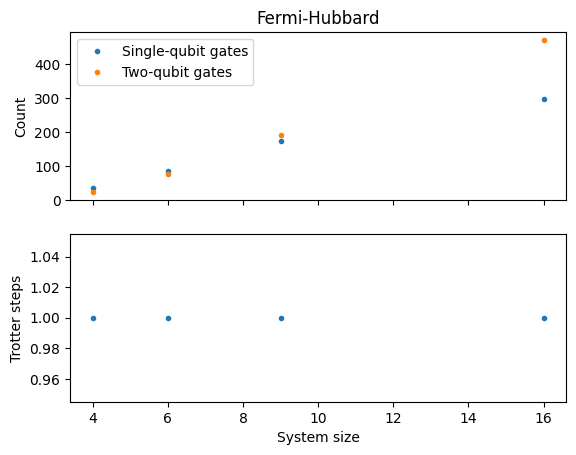

In [16]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df["size"], df["1q gates"], '.', label="Single-qubit gates")
ax[0].plot(df["size"], df["2q gates"], '.', label="Two-qubit gates")
ax[0].legend()
ax[0].set_ylabel("Count")
ax[1].plot(df["size"], df["steps"], '.', label="Trotter steps")
ax[1].set_xlabel("System size")
ax[1].set_ylabel("Trotter steps")
ax[0].set_title("Fermi-Hubbard")

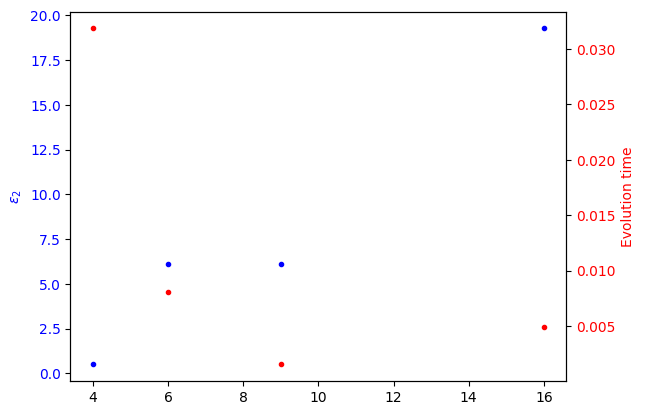

In [17]:
fig2, ax2 = plt.subplots()
color = "blue"
ax2.plot(df["size"], df["eps2"], '.', color=color, label=r"$\epsilon_2$")
# ax2.plot(df["size"], df["eps2 bound"], '.', label=r"Bound on $\epsilon_2$")
ax2.set_ylabel(r"$\epsilon_2$", color=color)
ax2.tick_params(axis="y", labelcolor=color)

color = "red"
ax2b = ax2.twinx()
ax2b.plot(df["size"], df["evol_time"], '.', color=color, label="Evolution time")
ax2b.set_ylabel("Evolution time", color=color)
ax2b.tick_params(axis="y", labelcolor=color)

In [18]:
df["single_step_err"] = df["eps2"] * (df["evol_time"] ** 2)

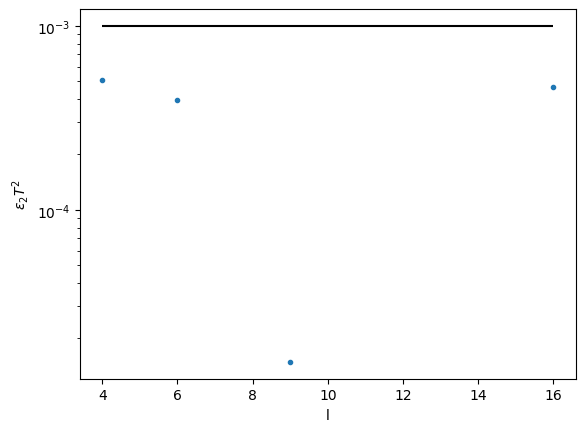

In [26]:
fig3, ax3 = plt.subplots()
ax3.plot(df["size"], df["single_step_err"], '.')
ax3.hlines(1e-3, np.min(df["size"]), np.max(df["size"]), colors="k")
ax3.set_xlabel("l")
ax3.set_ylabel(r"$\epsilon_2 T^2$")
ax3.set_yscale("log")

## Hubbard timing

In [45]:
data_dir = "data/hubbard_timing"
all_files = os.listdir(data_dir)
output_files = [f for f in all_files if "hdf" in f]
print(len(output_files))

16


In [47]:
records = []
for fname in output_files:
    f = h5py.File(f"{data_dir}/{fname}", "r")
    v2_time = f["v2_time"][()]
    eps2_time = f["eps2_time"][()]
    n_workers = f["n_workers"][()]
    l = f["l1"][()]
    f.close()
    records.append((n_workers, l, v2_time, eps2_time))
df = pd.DataFrame.from_records(records, columns=["n_workers", "l", "v2_time", "eps2_time"])
print(df.head())

   n_workers  l   v2_time    eps2_time
0          4  3   5210542    996379208
1          1  5  44198833  38527466500
2          4  2    170458     39348333
3          1  4  16368416  15173571542
4          6  4  16448250   3437855500


[2 3 4 5]


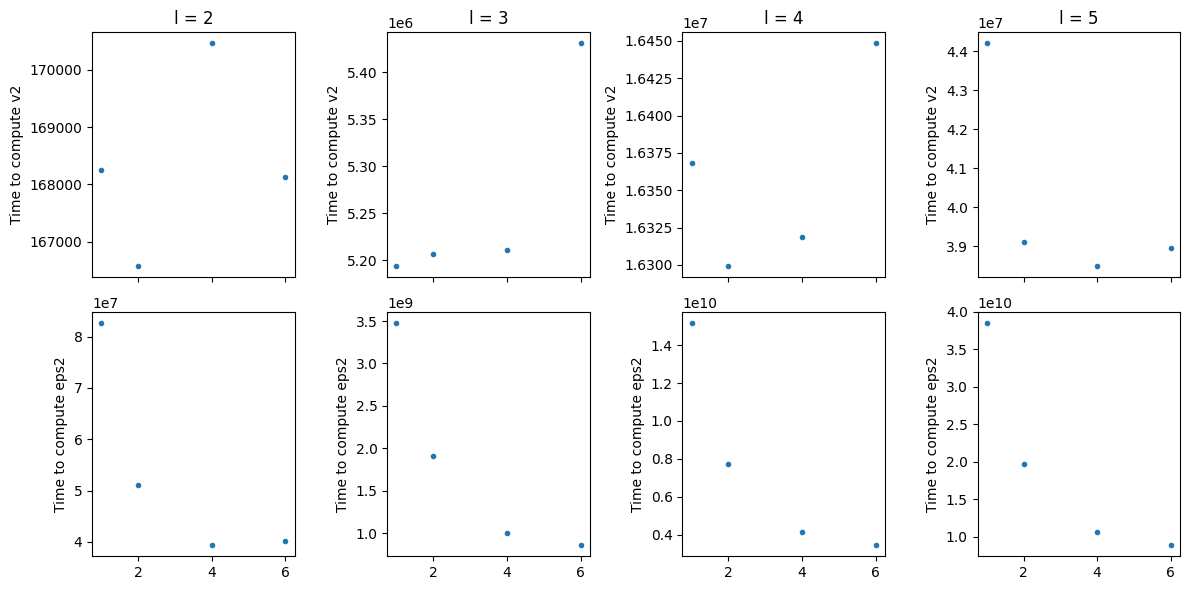

In [61]:
l_vals = np.unique(df["l"])
print(l_vals)
fig, ax = plt.subplots(2, len(l_vals), sharex=True, figsize=(12, 6))
for i, l in enumerate(l_vals):
    df_l = df[df["l"] == l]
    ax[0][i].plot(df_l["n_workers"], df_l["v2_time"], '.', label="v2")
    ax[1][i].plot(df_l["n_workers"], df_l["eps2_time"], '.', label="eps2")
    ax[0][i].set_ylabel("Time to compute v2")
    ax[1][i].set_ylabel("Time to compute eps2")
    ax[0][i].set_title(f"l = {l}")
fig.tight_layout()

## Hydrogen chains

In [27]:
all_files = os.listdir("data")
hubbard_files = [f for f in all_files if "hchain" in f and "out" in f and "hdf5" in f]
for f in hubbard_files:
    print(f)

hchain_out_4.hdf5
hchain_out_2.hdf5
hchain_out_2_new.hdf5
hchain_out_4_new.hdf5


In [28]:
records = []
for fname in hubbard_files:
    f = h5py.File(f"data/{fname}", "r")
    l = f["l"][()]
    nsteps = f["num_steps"][()]
    gate_counts = f["gate_counts"][:]
    eps2 = f["eps2_exact"][()]
    eps2_bound = f["eps2_bound"][()]
    evol_time = f["evol_time"][()]
    f.close()
    records.append((l, nsteps, gate_counts[0], gate_counts[1], eps2, eps2_bound, evol_time))
df = pd.DataFrame.from_records(records, columns=["size", "steps", "1q gates", "2q gates", "eps2", "eps2 bound", "evol_time"])
print(df.head())

   size  steps  1q gates  2q gates      eps2  eps2 bound  evol_time
0     4      1     11871      8972  0.049146   -0.000781   0.054401
1     2      2       697       534  0.012965   -0.000733   0.352262
2     2      2       697       534  0.012965   -0.000733   0.352262
3     4      1     11871      8972  0.051242   -0.000781   0.054401


Text(0.5, 1.0, 'Hydrogen chains')

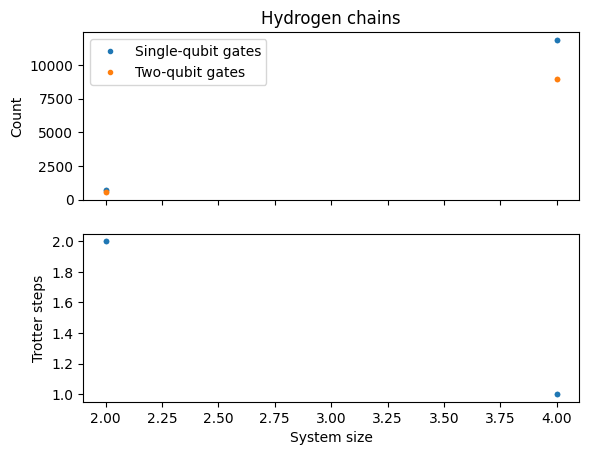

In [29]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df["size"], df["1q gates"], '.', label="Single-qubit gates")
ax[0].plot(df["size"], df["2q gates"], '.', label="Two-qubit gates")
ax[0].legend()
ax[0].set_ylabel("Count")
ax[1].plot(df["size"], df["steps"], '.', label="Trotter steps")
ax[1].set_xlabel("System size")
ax[1].set_ylabel("Trotter steps")
ax[0].set_title("Hydrogen chains")

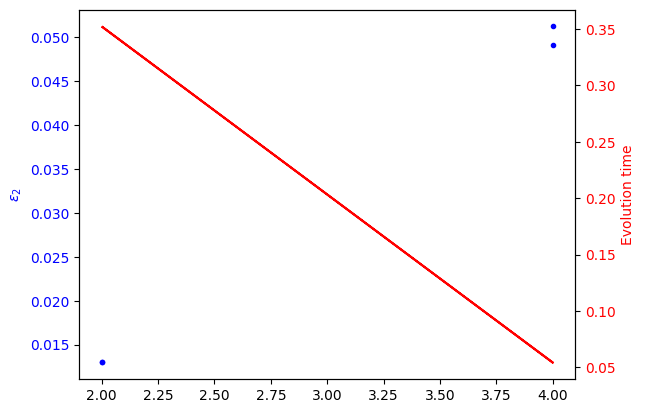

In [30]:
fig2, ax2 = plt.subplots()
color = "blue"
ax2.plot(df["size"], df["eps2"], '.', color=color, label=r"$\epsilon_2$")
# ax2.plot(df["size"], df["eps2 bound"], '.', label=r"Bound on $\epsilon_2$")
ax2.set_ylabel(r"$\epsilon_2$", color=color)
ax2.tick_params(axis="y", labelcolor=color)

color = "red"
ax2b = ax2.twinx()
ax2b.plot(df["size"], df["evol_time"], '-', color=color, label="Evolution time")
ax2b.set_ylabel("Evolution time", color=color)
ax2b.tick_params(axis="y", labelcolor=color)

In [31]:
df["single_step_err"] = df["eps2"] * (df["evol_time"] ** 2)

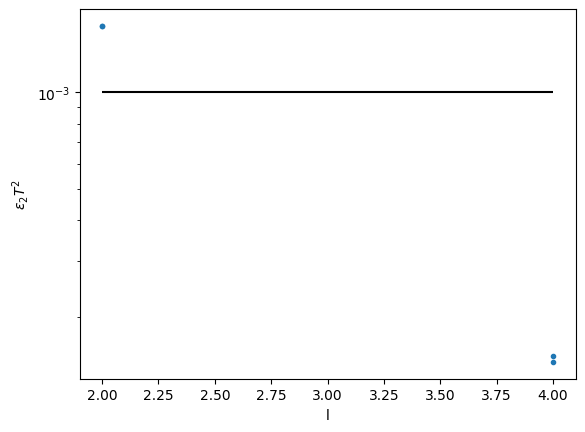

In [32]:
fig3, ax3 = plt.subplots()
ax3.plot(df["size"], df["single_step_err"], '.')
ax3.hlines(1e-3, np.min(df["size"]), np.max(df["size"]), colors="k")
ax3.set_xlabel("l")
ax3.set_ylabel(r"$\epsilon_2 T^2$")
ax3.set_yscale("log")